In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [4]:
print('test shape: ', test_df.shape)
print('train shape: ', train_df.shape)

test shape:  (418, 11)
train shape:  (891, 12)


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


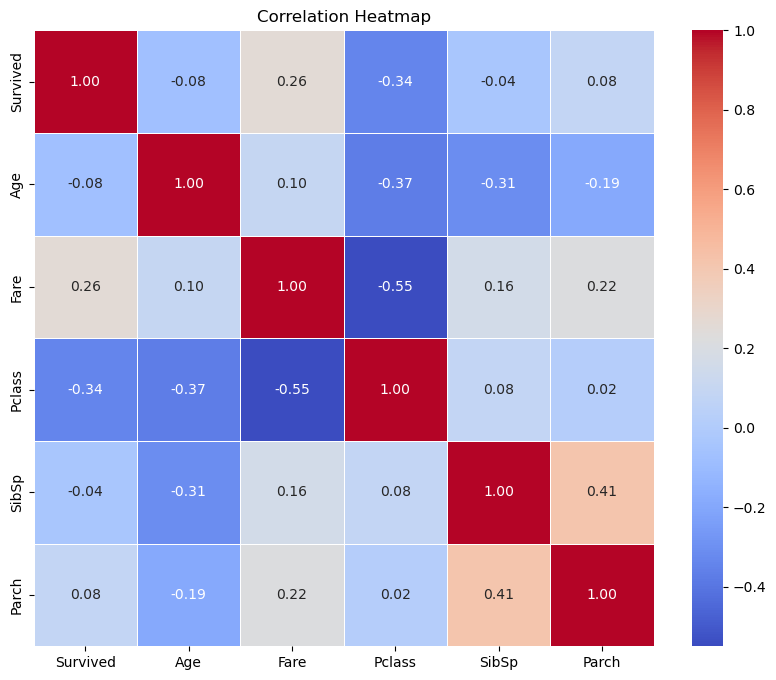

In [12]:
# first we will check how relative the numerical features are to the target variable  by using heatmap and fill the missing values accordingly
# we will use the heatmap to visualize the correlation between features and the target variable
corr_cols = ['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
correlation_df = train_df[corr_cols].copy()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
# It is more likely that a woman survived
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
train_df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Survival rate increases with passenger class and fare

In [16]:
train_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

People who embarked from C has better chance to live

In [18]:
# we will check what are the rate of survival based on 10 years age groups by a table

age_bins = pd.cut(train_df['Age'], bins=np.arange(0, 81, 10))
age_survival_rate = train_df.groupby(age_bins)['Survived'].mean()
age_survival_rate = age_survival_rate.reset_index()
age_survival_rate.columns = ['Age Group', 'Survival Rate']
age_survival_rate

/var/folders/y_/p6pwvv4d00d2hdmd7_r2t9240000gn/T/ipykernel_78845/1209939887.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = train_df.groupby(age_bins)['Survived'].mean()


,Age Group,Survival Rate
0,"(0, 10]",0.593750
1,"(10, 20]",0.382609
2,"(20, 30]",0.365217
3,"(30, 40]",0.445161
4,"(40, 50]",0.383721
5,"(50, 60]",0.404762
6,"(60, 70]",0.235294
7,"(70, 80]",0.200000


<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

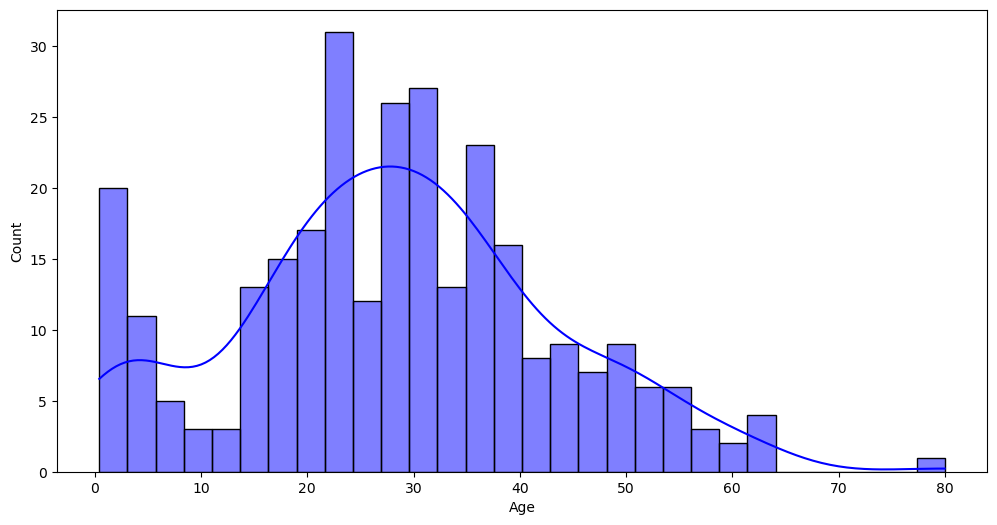

In [19]:
# check distribution of age of survivors and non-survivors
plt.figure(figsize=(12, 6))
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived', bins=30)
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

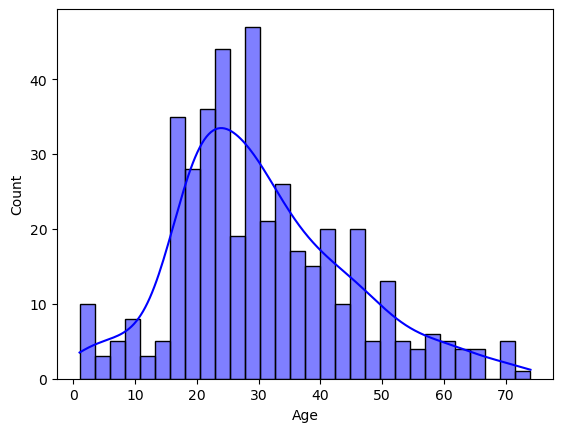

In [20]:
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], kde=True, color='blue', label='Survived', bins=30)
sns.histplot

In [ ]:
# Now we will create a imputer class to fill the missing values in  'Age' and 'Embarked' columns based on the analysis above.
from sklearn.base import BaseEstimator, TransformerMixin

class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        # no hyperparameters for now
        pass

    def fit(self, X, y=None):
        X = X.copy()
        # 1) learn median Age
        self.age_median_ = X['Age'].median()
        
        # 2) learn most-frequent Embarked per Pclass
        #    e.g. {1: 'S', 2: 'C', 3: 'S'}
        self.embarked_map_ = (
            X.groupby('Pclass')['Embarked']
             .agg(lambda s: s.mode().iat[0])
             .to_dict()
        )
        
        return self

    def transform(self, X):
        X = X.copy()
        # a) fill Age with the median we learned
        X['Age'] = X['Age'].fillna(self.age_median_)
        
        # b) fill Embarked by mapping Pclass → modal port
        X['Embarked'] = (
            X['Embarked']
             .fillna(X['Pclass'].map(self.embarked_map_))
        )
        
        return X
        